In [112]:
# Reference: https://jupyterbook.org/interactive/hiding.html
# Use {hide, remove}-{input, output, cell} tags to hiding content

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

# Creating a Model to Correct PurpleAir Measurements 

In [113]:
pd.set_option('display.max_columns', 9)

In [114]:
!ls data/cleaned_purpleair_aqs/

Fig1.csv
Fig4.csv
FigS1_IA.csv
Full24hrdataset.csv
README.txt
datadictionary_UScorrection_210408_rev3.docx
withheldfinaldataset_Fig7.csv


In [115]:
cols = ['Date', 'ID', 'region',
        'PM25FM', 'PM25cfatm', 'PM25cf1',
        'TempC', 'RH', 'Dewpoint']
full = pd.read_csv('data/cleaned_purpleair_aqs/Full24hrdataset.csv',
                   usecols=cols, parse_dates=['Date'])
full

,Date,ID,region,PM25FM,PM25cfatm,PM25cf1,TempC,RH,Dewpoint
0,2019-05-17,AK1,Alaska,6.7,8.26,8.62,18.03,38.56,3.63
1,2019-05-18,AK1,Alaska,3.8,3.36,3.49,16.12,49.40,5.44
2,2019-05-21,AK1,Alaska,4.0,3.80,3.80,19.90,29.97,1.73
...,...,...,...,...,...,...,...,...,...
12427,2019-02-20,WI6,North,15.6,25.01,25.30,1.71,65.78,-4.08
12428,2019-03-04,WI6,North,14.0,8.21,8.21,-14.38,48.21,-23.02
12429,2019-03-22,WI6,North,5.8,9.44,9.44,5.08,52.20,-4.02


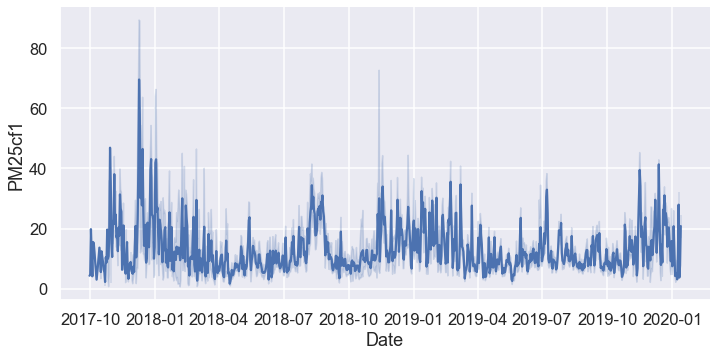

In [116]:
sns.relplot(data=full, x='Date', y='PM25cf1', kind='line', aspect=2)

In [117]:
region_weekly = (full
 .set_index('Date')
 .groupby('region')
 .resample('W')
 .mean()
 .reset_index()
)
region_weekly

,region,Date,PM25FM,PM25cfatm,PM25cf1,TempC,RH,Dewpoint
0,Alaska,2018-11-11,13.46,11.78,11.87,-3.72,51.81,-12.30
1,Alaska,2018-11-18,7.96,7.40,7.65,-4.53,51.48,-13.12
2,Alaska,2018-11-25,6.24,6.04,6.08,-2.88,54.19,-10.95
...,...,...,...,...,...,...,...,...
429,West,2019-12-15,10.00,20.83,21.93,15.50,62.89,8.38
430,West,2019-12-22,11.90,25.72,26.37,13.24,56.09,4.60
431,West,2019-12-29,9.07,18.53,19.62,11.88,58.64,3.92


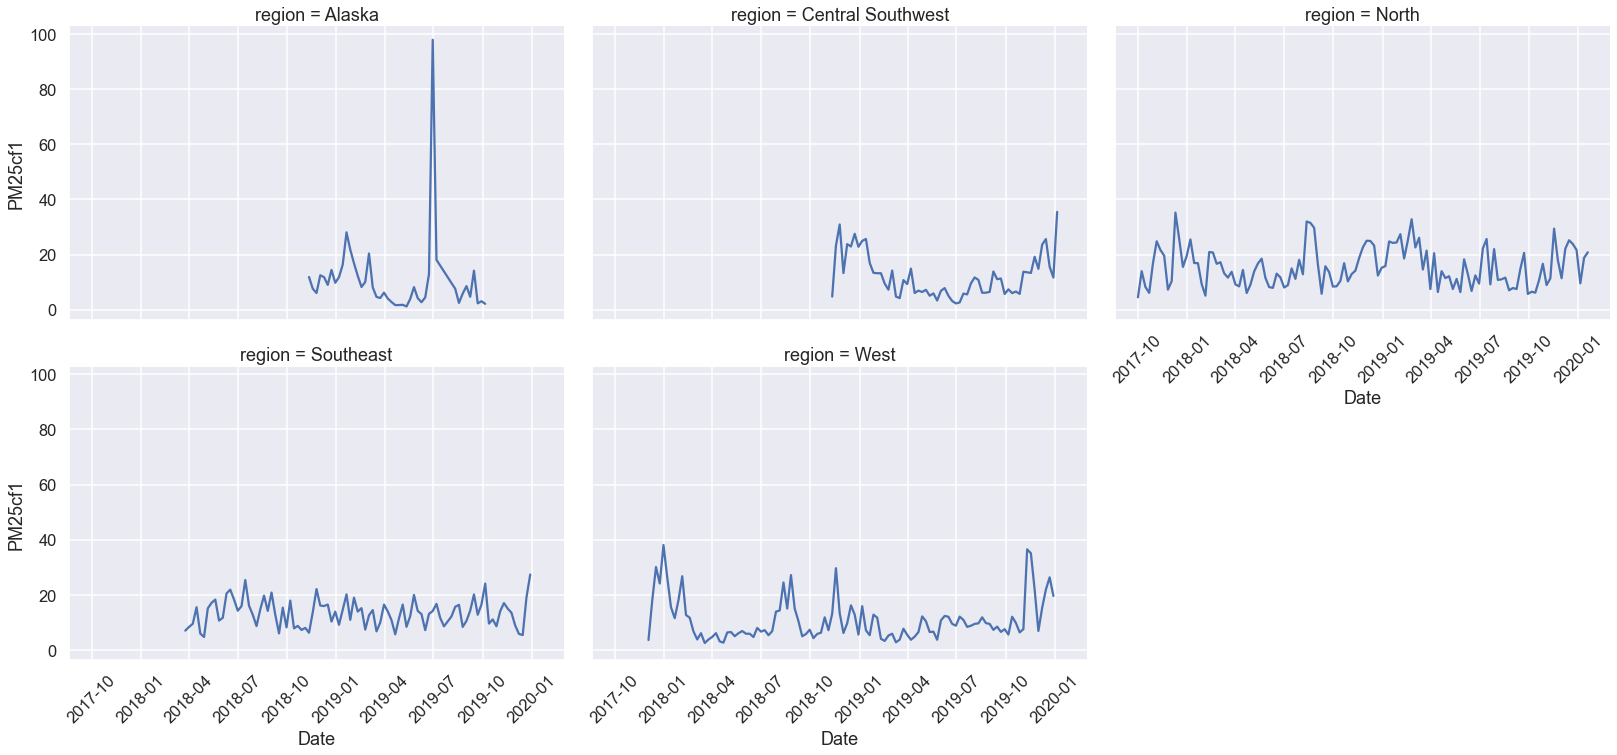

In [118]:
g = sns.relplot(data=region_weekly, 
                x='Date', y='PM25cf1', col='region', col_wrap=3,
                kind='line', aspect=1.5)

g.set_xticklabels(rotation=45);

In [119]:
full

,Date,ID,region,PM25FM,PM25cfatm,PM25cf1,TempC,RH,Dewpoint
0,2019-05-17,AK1,Alaska,6.7,8.26,8.62,18.03,38.56,3.63
1,2019-05-18,AK1,Alaska,3.8,3.36,3.49,16.12,49.40,5.44
2,2019-05-21,AK1,Alaska,4.0,3.80,3.80,19.90,29.97,1.73
...,...,...,...,...,...,...,...,...,...
12427,2019-02-20,WI6,North,15.6,25.01,25.30,1.71,65.78,-4.08
12428,2019-03-04,WI6,North,14.0,8.21,8.21,-14.38,48.21,-23.02
12429,2019-03-22,WI6,North,5.8,9.44,9.44,5.08,52.20,-4.02


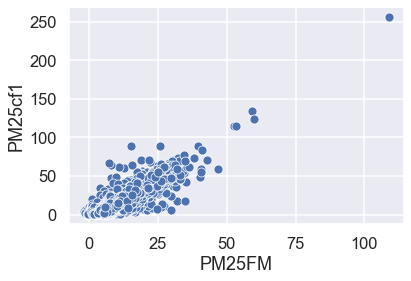

In [120]:
sns.scatterplot(data=full, x='PM25FM', y='PM25cf1');

In [121]:
full

,Date,ID,region,PM25FM,PM25cfatm,PM25cf1,TempC,RH,Dewpoint
0,2019-05-17,AK1,Alaska,6.7,8.26,8.62,18.03,38.56,3.63
1,2019-05-18,AK1,Alaska,3.8,3.36,3.49,16.12,49.40,5.44
2,2019-05-21,AK1,Alaska,4.0,3.80,3.80,19.90,29.97,1.73
...,...,...,...,...,...,...,...,...,...
12427,2019-02-20,WI6,North,15.6,25.01,25.30,1.71,65.78,-4.08
12428,2019-03-04,WI6,North,14.0,8.21,8.21,-14.38,48.21,-23.02
12429,2019-03-22,WI6,North,5.8,9.44,9.44,5.08,52.20,-4.02


In [214]:
features[features.isna().any(axis='columns')]

,PM25FM,TempC,RH,Dewpoint
644,5.21,NaN,NaN,NaN
3405,9.70,NaN,NaN,NaN
3808,8.12,NaN,NaN,NaN
...,...,...,...,...
11801,2.70,NaN,47.46,NaN
11802,5.90,NaN,50.73,NaN
11803,3.20,NaN,49.57,NaN


## Simplest model: Use average PM2.5

In [178]:
pa = full['PM25cf1']
pa

0         8.62
1         3.49
2         3.80
         ...  
12427    25.30
12428     8.21
12429     9.44
Name: PM25cf1, Length: 12430, dtype: float64

In [179]:
features = full[['PM25FM', 'TempC', 'RH', 'Dewpoint']]
features

,PM25FM,TempC,RH,Dewpoint
0,6.7,18.03,38.56,3.63
1,3.8,16.12,49.40,5.44
2,4.0,19.90,29.97,1.73
...,...,...,...,...
12427,15.6,1.71,65.78,-4.08
12428,14.0,-14.38,48.21,-23.02
12429,5.8,5.08,52.20,-4.02


In [180]:
def model_avg(features, response):
    avg = np.mean(response)
    return np.repeat(avg, len(response))

In [181]:
model_avg(features, pa)

array([13.36, 13.36, 13.36, ..., 13.36, 13.36, 13.36])

In [182]:
from sklearn.metrics import mean_squared_error

In [183]:
def rmse(model):
    predictions = model(features, pa)
    return mean_squared_error(pa, predictions, squared=False)

In [184]:
rmse(model_avg)

11.658373314539448

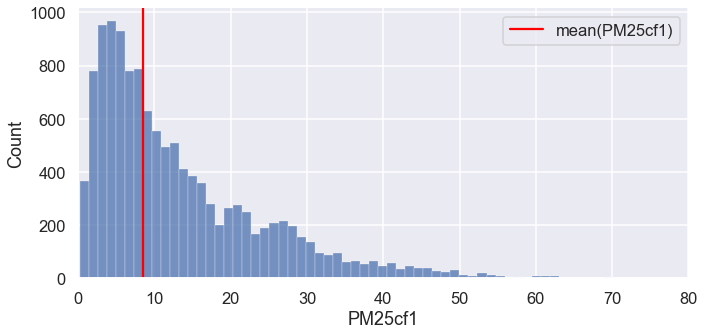

In [185]:
sns.displot(data=full, x='PM25cf1', aspect=2)
plt.axvline(np.mean(truth), c='red', label='mean(PM25cf1)')
plt.xlim(0, 80)
plt.legend();

## Model: Use AQS as-is

In [186]:
def model_as_is(features, response):
    return features['PM25FM']

In [187]:
model_as_is(features, pa)

0         6.7
1         3.8
2         4.0
         ... 
12427    15.6
12428    14.0
12429     5.8
Name: PM25FM, Length: 12430, dtype: float64

In [188]:
rmse(model_as_is)

8.80718864899232

In [189]:
def compare_models(models):
    results = [[model.__name__, rmse(model)] for model in models]
    return pd.DataFrame(results, columns=['model', 'rmse'])

In [190]:
compare_models([model_avg, model_as_is])

,model,rmse
0,model_avg,11.66
1,model_as_is,8.81


## Model: Adjust PA by a constant

In [191]:
def model_plus_constant(features, response):
    adjustment = (response - features['PM25FM']).mean()
    return features['PM25FM'] + adjustment

In [192]:
rmse(model_plus_constant)

7.354446180444175

In [193]:
compare_models([model_avg, model_as_is, model_plus_constant])

,model,rmse
0,model_avg,11.66
1,model_as_is,8.81
2,model_plus_constant,7.35


## Model: Simple Linear Regression

okay, so in the paper they use the FRM to predict PA, then inverse the model to calculate RMSE. should we do the same?

In [226]:
clf = LinearRegression().fit(features[['PM25FM']], pa)
clf.coef_, clf.intercept_

test = (pa - clf.intercept_) / clf.coef_
mean_squared_error(features['PM25FM'], test, squared=False)

2.8688203668088437

In [228]:
clf = LinearRegression().fit(full[['PM25cf1']], full['PM25FM'])
clf.coef_, clf.intercept_

pred = clf.predict(full[['PM25cf1']])
mean_squared_error(full['PM25FM'], pred, squared=False)

2.5320196034685662

In [194]:
from sklearn.linear_model import LinearRegression

def model_simple_lin(features, response):
    features = features[['PM25FM']]
    model = LinearRegression().fit(features, response)
    return model.predict(features)

In [195]:
rmse(model_simple_lin)

5.480898890962079

In [196]:
compare_models([model_avg, model_as_is, model_plus_constant, model_simple_lin])

,model,rmse
0,model_avg,11.66
1,model_as_is,8.81
2,model_plus_constant,7.35
3,model_simple_lin,5.48


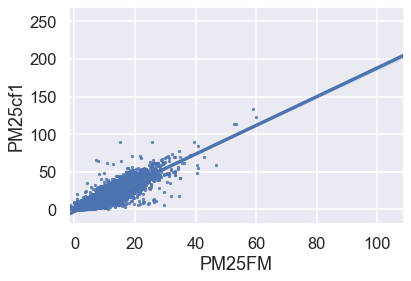

In [201]:
sns.regplot(data=full, x='PM25FM', y='PM25cf1', scatter_kws={'s': 5});

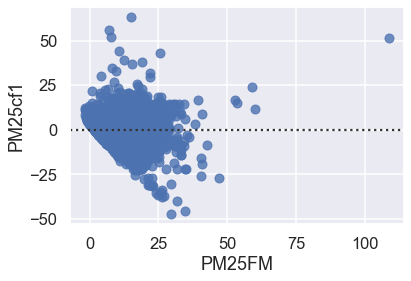

In [202]:
sns.residplot(data=full, x='PM25FM', y='PM25cf1');

## Model: Simple Linear Regression

In [199]:
from sklearn.linear_model import LinearRegression

def model_simple_lin(features, truth):
    features = features[['PM25cf1']]
    model = LinearRegression().fit(features, truth)
    return model.predict(features)

In [200]:
rmse(model_simple_lin)

KeyError: "None of [Index(['PM25cf1'], dtype='object')] are in the [columns]"

In [ ]:
compare_models([model_avg, model_as_is, model_plus_constant, model_simple_lin])